# **Import Modules dan dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split


# **Load Data Collection**

In [3]:
#Data collection menambah/import dataset atau data collection nya
dataset_wine = pd.read_csv('winequality.csv')

# **Check Dataset Wine**

In [ ]:
#melihat total data yang ada di dataset wine
dataset_wine.shape

(1599, 12)

In [4]:
dataset_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
dataset_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#melihat 5 baris dari dataset wine
dataset_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Melihat atau mengecek untuk nilai data yang hilang
dataset_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Analisis Data dan Visualisasi**

In [ ]:
#stastical measures the dataset
dataset_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


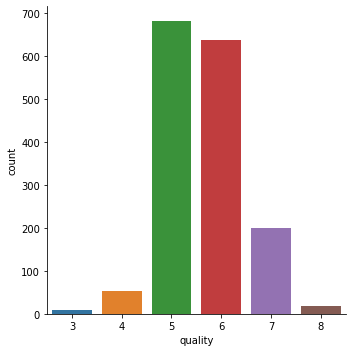

In [ ]:
#number of values for each quality
#jumlah nilai untuk setiap class quality
sns.catplot(x = 'quality', data = dataset_wine, kind = 'count')

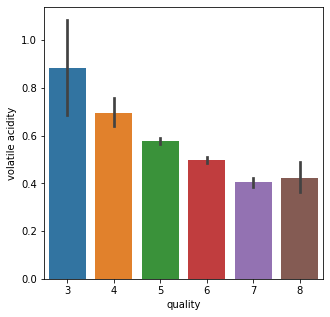

In [ ]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset_wine)

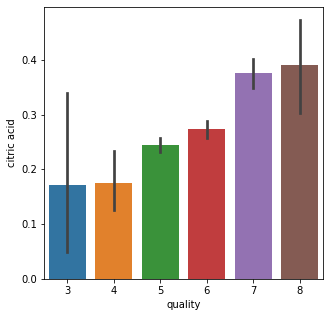

In [ ]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = dataset_wine)

# **Correlation atau korelasi**

Terdapat dua korelasi atau correlation :
1. korelasi positif
2. korelasi negatif

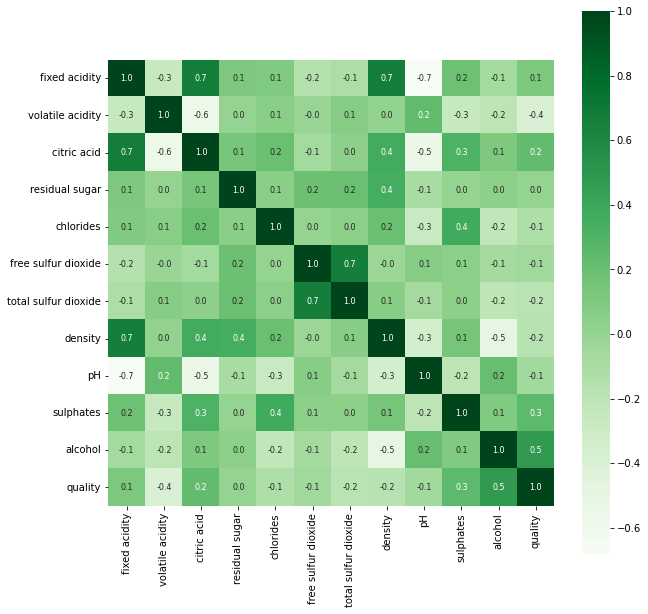

In [ ]:
# constructing a heatmap to understand the correlation antara beberapa coloumns
correlation = dataset_wine.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

# **Data Preprocessing**

In [ ]:
# separate(memisahkan) the data and label
# memisahkan data atribut dan class
X = dataset_wine.drop('quality', axis=1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# **Label Binarization (merubah data class ke dalam Biner)**

In [ ]:
Y = dataset_wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# **Memisahkan data Train dan data Test**

In [ ]:
#Test_size = 0.2 adalah function untuk membagi 20% data dari keseluruhan jumlah data set ke dalam variable data test dan sisa data nya akan masuk kedalam data train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# **Class Imbalancement**

In [ ]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, Y = oversample.fit_resample(X, Y)

In [ ]:
Y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

# **Model Training :**
Random forest Clasifier model (Decision Tree) - Multiple Decision Tree

In [ ]:
#model = RandomForestClassifier()

#clasify function
def classify(model, X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

  #train the model
  model.fit(X_train, Y_train)
  print('Akurasi:', model.score(X_test, Y_test) * 100)

  #cross validation
  score = cross_val_score(model, X, Y, cv=5)
  print("CV Score:", np.mean(score)*100)


In [ ]:
#model.fit(X_train, Y_train)

RandomForestClassifier()

# **Model Evaluation - Evaluasi Hasil**

Score Akurasi data

In [ ]:
#Score akurasi pada data test
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Akurasi : ', test_data_accuracy * 100)

Akurasi :  92.8125


Mendapatkan hasil Akurasi 92.8 % hasil akurasi tersebut melebihi 75% yang artinya klasifikasi dari metode random forest mendapatkan nilai akurasi tinggi

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)


Akurasi: 81.91027496382056
CV Score: 79.92157402311501


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Akurasi: 90.88277858176555
CV Score: 86.61405508818827


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Akurasi: 93.63241678726484
CV Score: 91.13596456744503


# **Sistem Prediksi untuk mendapatkan wine kualitas**

In [ ]:
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
  print('Kualitas Wine Bagus')
else:
  print('Kualitas Wine Buruk')

[1]
Kualitas Wine Bagus
